# 데이터 불러오기

In [1]:
import pandas as pd 

df_train = pd.read_csv('train_data.csv')
df_valid = pd.read_csv('valid_data.csv')
df_test = pd.read_csv('test_data.csv')

## y 값 지정 및 레이블

In [2]:
y_train = df_train.iloc[:, 5]
y_valid = df_valid.iloc[:, 5]
y_test = df_test.iloc[:, 5]

In [3]:
y_train

0            in
1        normal
2        normal
3         other
4           out
          ...  
50046       out
50047       out
50048    normal
50049        in
50050        in
Name: leaktype, Length: 50051, dtype: object

In [4]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels with value between 0 and n_classes-1
# XGBClassifier를 사용하기 위해 대상 레이블을 정수로 인코딩해야 합니다.
# 현재 대상 레이블은 범주형 문자열이므로, LabelEncoder를 사용하여 숫자로 변환해야 합니다.

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_valid = label_encoder.transform(y_valid)
y_test = label_encoder.transform(y_test)

# got ['in' 'noise' 'normal' 'other' 'out']---> 클래스를 정수로 인코딩: [0 1 2 3 4]

## 혼동행렬 def

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import itertools

# 혼동 행렬 그리기 함수 정의
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# model_535 parameter

In [6]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score

In [7]:
# x_train 설정
x_train = df_train.iloc[:, [3, 4] + list(range(6, df_train.shape[1]))]

# x_valid 설정
x_valid = df_valid.iloc[:, [3, 4] + list(range(6, df_valid.shape[1]))]

# x_test 설정
x_test = df_test.iloc[:, [3, 4] + list(range(6, df_test.shape[1]))]

In [8]:
print(x_train.shape)
print(y_train.shape)

print(x_valid.shape)
print(y_valid.shape)

print(x_test.shape)
print(y_test.shape)

(50051, 535)
(50051,)
(12513, 535)
(12513,)
(7820, 535)
(7820,)


In [9]:
# DNN 모델 정의
model_535= models.Sequential([
    layers.Input(shape=(x_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(np.unique(y_train)), activation='softmax')
])

# 모델 컴파일
model_535.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
history = model_535.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_valid, y_valid))

# 검증 데이터로 예측
y_pred_prob_valid = model_535.predict(x_valid)
y_pred_valid = np.argmax(y_pred_prob_valid, axis=1)

# 검증 데이터 정확도 평가
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print(f"DNN Validation Accuracy: {accuracy_valid:.4f}")

# 테스트 데이터로 예측
y_pred_prob_test = model_535.predict(x_test)
y_pred_test = np.argmax(y_pred_prob_test, axis=1)

# 테스트 데이터 정확도 평가
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"DNN Test Accuracy: {accuracy_test:.4f}")

Epoch 1/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.4978 - loss: 7.6650 - val_accuracy: 0.5637 - val_loss: 0.9655
Epoch 2/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5738 - loss: 0.9573 - val_accuracy: 0.5708 - val_loss: 0.9124
Epoch 3/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.5863 - loss: 0.8937 - val_accuracy: 0.4801 - val_loss: 1.1218
Epoch 4/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5989 - loss: 0.8731 - val_accuracy: 0.6098 - val_loss: 0.8519
Epoch 5/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6140 - loss: 0.8439 - val_accuracy: 0.5926 - val_loss: 0.9217
Epoch 6/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6184 - loss: 0.8326 - val_accuracy: 0.6313 - val_loss: 0.8180
Epoch 7/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6318 - loss: 0.8088 - val_accuracy: 0.6399 - val_loss: 0.7823
Epoch 8/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6445 - loss: 0.7836

Confusion matrix, without normalization
Normalized confusion matrix


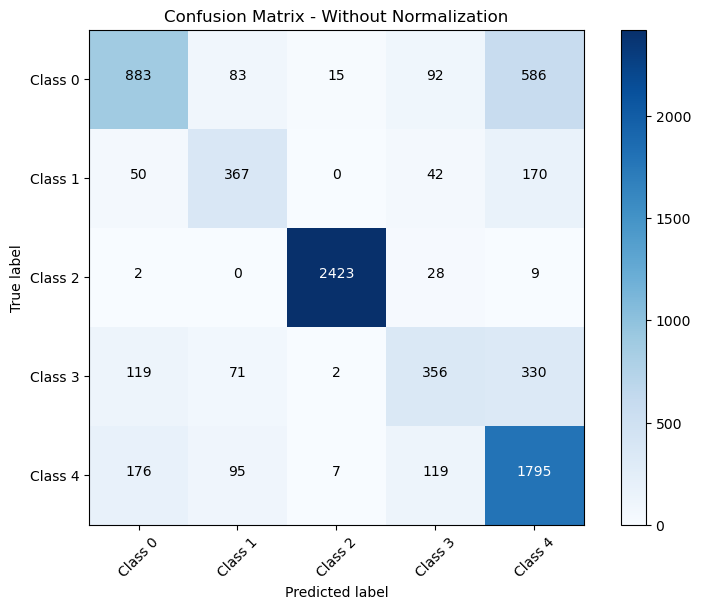

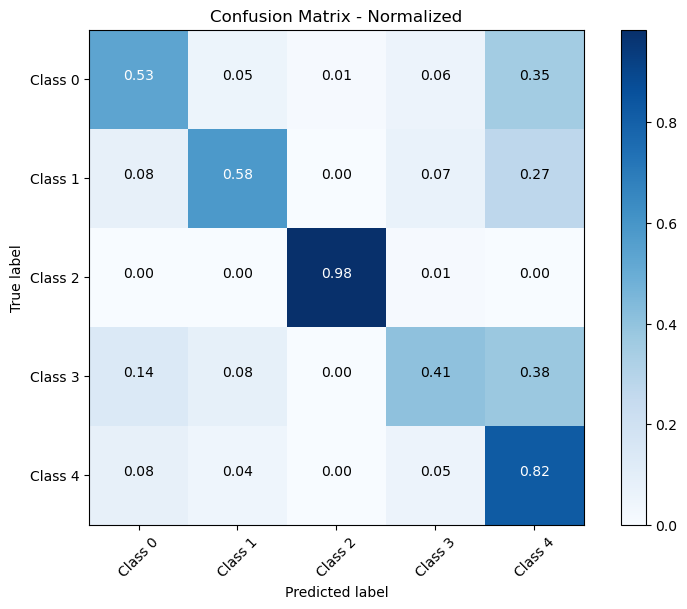

In [11]:
# 테스트 데이터에 대한 혼동 행렬 계산
confusion_mtx = confusion_matrix(y_test, y_pred_test)

# 클래스 레이블 설정
classes = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']

# 혼동 행렬 그리기 (정규화하지 않음)
plot_confusion_matrix(confusion_mtx, classes=classes, title='Confusion Matrix - Without Normalization')

# 혼동 행렬 그리기 (정규화)
plot_confusion_matrix(confusion_mtx, classes=classes, normalize=True, title='Confusion Matrix - Normalized')

plt.show()

# model_top_53_features

In [14]:
columns = ["llevel", "lrate","90HZ", "100HZ", "110HZ", "120HZ", "130HZ", "140HZ", "150HZ", "160HZ", "170HZ", "180HZ", "190HZ", 
           "200HZ", "210HZ", "220HZ", "230HZ", "240HZ", "250HZ", "260HZ", "270HZ", "280HZ", "290HZ", "300HZ", 
           "310HZ", "320HZ", "330HZ", "340HZ", "350HZ", "360HZ", "370HZ", "380HZ", "390HZ", "400HZ", "410HZ", 
           "420HZ", "430HZ", "440HZ", "450HZ", "460HZ", "470HZ", "480HZ", "510HZ", "540HZ", "560HZ", "720HZ", 
           "730HZ", "740HZ", "760HZ", "770HZ", "780HZ", "830HZ", "840HZ"]

In [15]:
# x_train 설정
x_train = x_train = df_train[columns]

# x_valid 설정
x_valid = x_valid = df_valid[columns]

# x_test 설정
x_test = x_test = df_test[columns]

In [16]:
# DNN 모델 정의
model_53= models.Sequential([
    layers.Input(shape=(x_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(np.unique(y_train)), activation='softmax')
])

# 모델 컴파일
model_53.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
history = model_53.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_valid, y_valid))

# 검증 데이터로 예측
y_pred_prob_valid = model_53.predict(x_valid)
y_pred_valid = np.argmax(y_pred_prob_valid, axis=1)

# 검증 데이터 정확도 평가
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print(f"DNN Validation Accuracy: {accuracy_valid:.4f}")

# 테스트 데이터로 예측
y_pred_prob_test = model_53.predict(x_test)
y_pred_test = np.argmax(y_pred_prob_test, axis=1)

# 테스트 데이터 정확도 평가
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"DNN Test Accuracy: {accuracy_test:.4f}")

Epoch 1/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4669 - loss: 5.9980 - val_accuracy: 0.5742 - val_loss: 1.5716
Epoch 2/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6141 - loss: 1.3338 - val_accuracy: 0.6417 - val_loss: 1.0387
Epoch 3/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6700 - loss: 0.9288 - val_accuracy: 0.6651 - val_loss: 0.9110
Epoch 4/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6944 - loss: 0.7892 - val_accuracy: 0.7066 - val_loss: 0.7217
Epoch 5/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7207 - loss: 0.7077 - val_accuracy: 0.7382 - val_loss: 0.6705
Epoch 6/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7433 - loss: 0.6496 - val_accuracy: 0.7429 - val_loss: 0.6558
Epoch 7/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7602 - loss: 0.6021 - val_accuracy: 0.7459 - val_loss: 0.6271
Epoch 8/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7766 - loss: 0.5682 - 

Confusion matrix, without normalization
Normalized confusion matrix


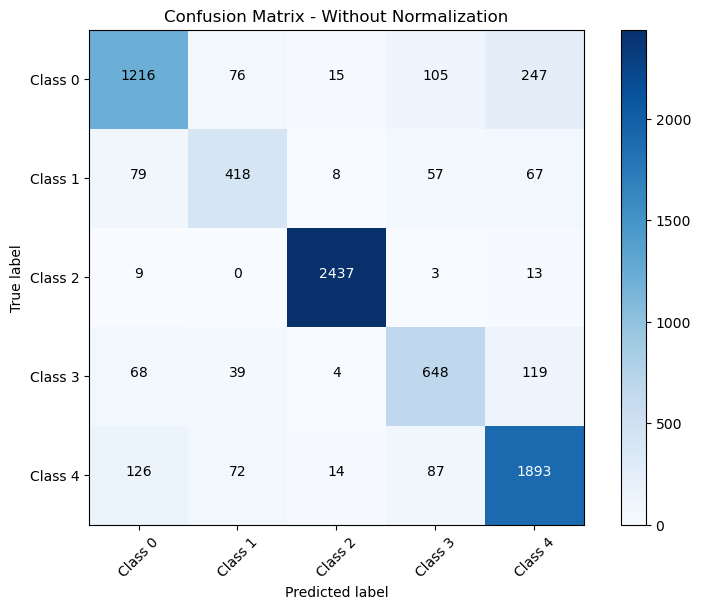

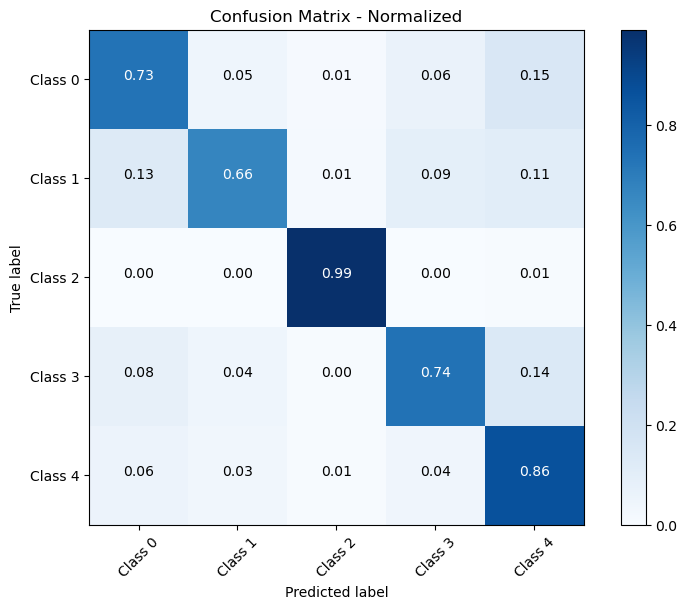

In [22]:
# 테스트 데이터에 대한 혼동 행렬 계산
confusion_mtx = confusion_matrix(y_test, y_pred_test)

# 클래스 레이블 설정
classes = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']

# 혼동 행렬 그리기 (정규화하지 않음)
plot_confusion_matrix(confusion_mtx, classes=classes, title='Confusion Matrix - Without Normalization')

# 혼동 행렬 그리기 (정규화)
plot_confusion_matrix(confusion_mtx, classes=classes, normalize=True, title='Confusion Matrix - Normalized')

plt.show()

# model 100-600hz, 1000-2000hz (1612)

In [12]:
x_train = pd.concat([df_train.iloc[:, 16:67], df_train.iloc[:, 106:207]], axis=1)
x_valid = pd.concat([df_valid.iloc[:, 16:67], df_valid.iloc[:, 106:207]], axis=1)
x_test = pd.concat([df_test.iloc[:, 16:67], df_test.iloc[:, 106:207]], axis=1)

In [13]:
# DNN 모델 정의
model_1612= models.Sequential([
    layers.Input(shape=(x_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(np.unique(y_train)), activation='softmax')
])

# 모델 컴파일
model_1612.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
history = model_1612.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_valid, y_valid))

# 검증 데이터로 예측
y_pred_prob_valid = model_1612.predict(x_valid)
y_pred_valid = np.argmax(y_pred_prob_valid, axis=1)

# 검증 데이터 정확도 평가
accuracy_valid = accuracy_score(y_valid, y_pred_valid)
print(f"DNN Validation Accuracy: {accuracy_valid:.4f}")

# 테스트 데이터로 예측
y_pred_prob_test = model_1612.predict(x_test)
y_pred_test = np.argmax(y_pred_prob_test, axis=1)

# 테스트 데이터 정확도 평가
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"DNN Test Accuracy: {accuracy_test:.4f}")

Epoch 1/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4662 - loss: 3.9753 - val_accuracy: 0.6105 - val_loss: 1.0987
Epoch 2/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6401 - loss: 0.9998 - val_accuracy: 0.6699 - val_loss: 0.8714
Epoch 3/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6910 - loss: 0.8243 - val_accuracy: 0.6935 - val_loss: 0.7829
Epoch 4/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7122 - loss: 0.7525 - val_accuracy: 0.7201 - val_loss: 0.7170
Epoch 5/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7349 - loss: 0.7050 - val_accuracy: 0.7489 - val_loss: 0.6698
Epoch 6/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7539 - loss: 0.6630 - val_accuracy: 0.7507 - val_loss: 0.6489
Epoch 7/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7701 - loss: 0.6168 - val_accuracy: 0.7735 - val_loss: 0.6203
Epoch 8/20
1565/1565 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7881 - loss: 0.5765 -

Confusion matrix, without normalization
Normalized confusion matrix


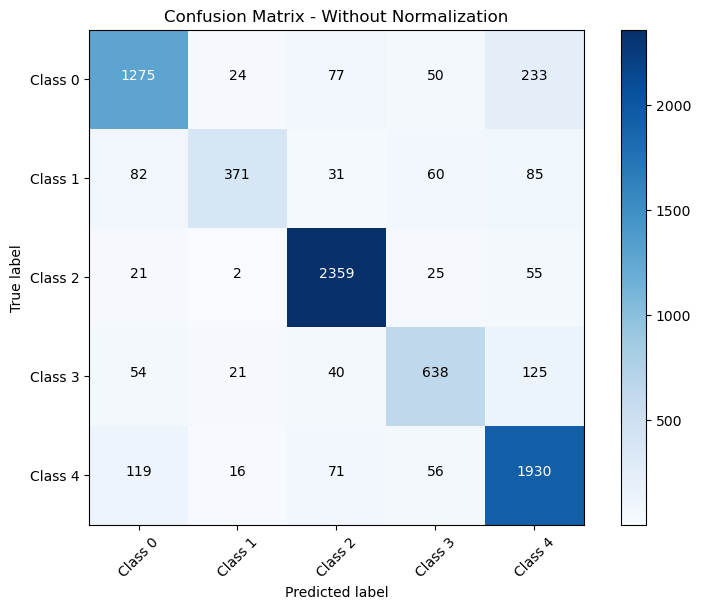

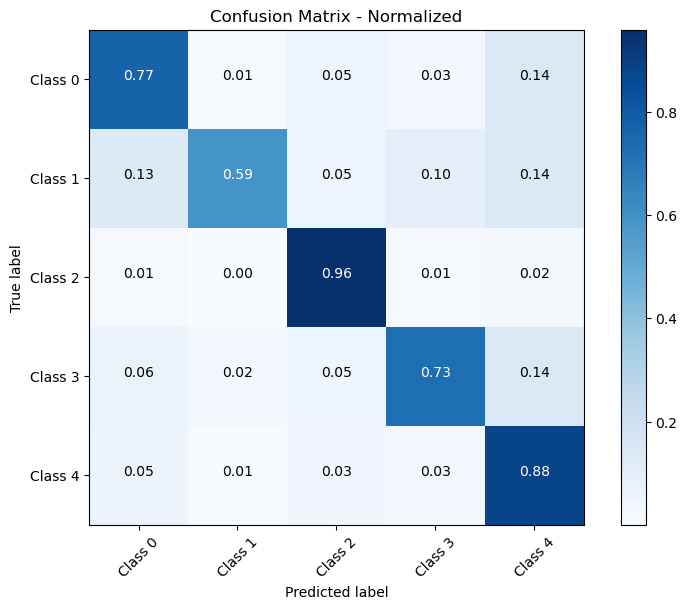

In [14]:
# 테스트 데이터에 대한 혼동 행렬 계산
confusion_mtx = confusion_matrix(y_test, y_pred_test)

# 클래스 레이블 설정
classes = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']

# 혼동 행렬 그리기 (정규화하지 않음)
plot_confusion_matrix(confusion_mtx, classes=classes, title='Confusion Matrix - Without Normalization')

# 혼동 행렬 그리기 (정규화)
plot_confusion_matrix(confusion_mtx, classes=classes, normalize=True, title='Confusion Matrix - Normalized')

plt.show()